* This notebook was made to look at:
1) Total CTD casts carried out by IOS.
2) How seasonally they are distributed?
3) The location?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os
import datetime

import pandas as pd
import netCDF4 as nc
import datetime
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
from salishsea_tools import viz_tools, nc_tools, geo_tools,tidetools
import scipy.io as sio
from glob import glob
import ACTDR
#from datetime import datetime
%matplotlib inline

In [2]:
## the data I created by JieCreate_SOG_dat.py, including all the data
## except duplicate and anomalies.
ACTDR.load_dat('SOG_to.dat')

> open  SOG_to.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  SOG_to.dat
> complete


In [3]:
len(ACTDR.CTD_DAT)

2626

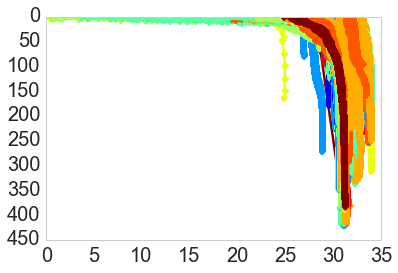

In [4]:
cmap=cm.get_cmap('jet',12)
count=0
for cast in ACTDR.CTD_DAT:
    plt.plot(cast['Salinity'],cast['Depth'],marker='o',c=cmap(cast['Month']-1))
    count=count+1
plt.axis([0,35,450,0])
plt.grid()

/home/jieliu/anaconda3/envs/mypython2/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


(47.5, 50.3)

/home/jieliu/anaconda3/envs/mypython2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


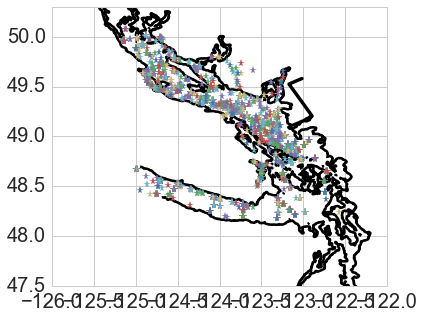

In [5]:
fig, ax = plt.subplots(1,1,figsize = (6,5))
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
grid2 = nc.Dataset('/ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
casts = []
for cast in ACTDR.CTD_DAT:
    year = cast['Year']
    plt.plot(cast['Longitude'], cast['Latitude'], '*', markersize = 8)
        #casts.append(cast['Year'])
#max(casts)
ax.set_xlim([-126.,-122.])
ax.set_ylim([47.5,50.3])

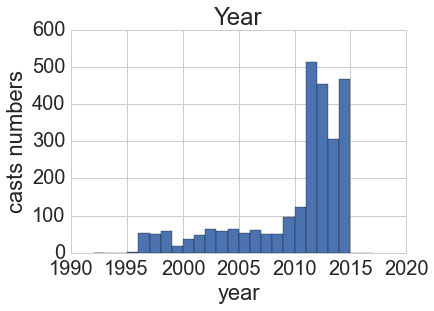

In [6]:
data = pd.DataFrame(ACTDR.CTD_DAT)

max_year = data['Year'].max()
min_year = data['Year'].min()
data.hist('Year', bins = range(min_year - 3, max_year + 4))
plt.ylabel('casts numbers')
plt.xlabel('year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

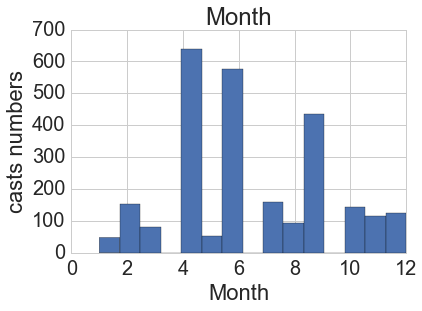

In [20]:
data.hist('Month',bins = 15)
plt.ylabel('casts numbers')
plt.xlabel('Month')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

# Central strait 

(47.5, 50.3)

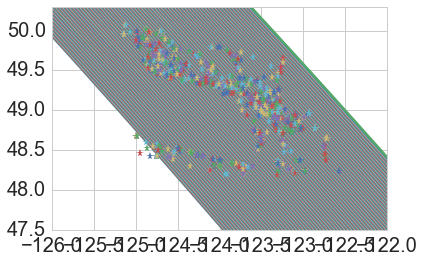

In [8]:
## check why some of the data not work, it goes out of the model domain
bathyy, X, Y = tidetools.get_SS2_bathy_data()
plt.plot(X,Y)
for cast in ACTDR.CTD_DAT:
    year = cast['Year']
    plt.plot(cast['Longitude'], cast['Latitude'], '*', markersize = 8)
        #casts.append(cast['Year'])
#max(casts)
plt.xlim([-126,-122.])
plt.ylim([47.5,50.3])

In [9]:
def select_cast_cSog(flag, imin, imax, jmin, jmax):
    """This function was made to select 
        the cast in the different SoG region in 
        different month
        1)in all the years if flag = 1
        2)only in year 2014 and the specific month if flag = 2
        3)only except year 2014 if flag = 3"""
    
    s_cast = []
    if flag ==1:
        for cast in ACTDR.CTD_DAT:
            if cast['Longitude'] >=-124 and cast['Latitude']>= 48.8:
                [x1, y1] = geo_tools.find_closest_model_point(cast['Longitude'] , \
                cast['Latitude'],X,Y,land_mask=bathyy.mask)
                if (x1 < jmax) and (x1 > jmin) and (y1 < imax) and (y1 > imin):
                    s_cast.append(cast)
    if flag ==2:
        for cast in ACTDR.CTD_DAT:
            if cast['Longitude'] >=-124 and cast['Latitude']>= 48.8:
                [x1, y1] = geo_tools.find_closest_model_point(cast['Longitude'] , \
                cast['Latitude'],X,Y,land_mask=bathyy.mask)
                if (x1 < jmax) and (x1 > jmin) and (y1 < imax) and (y1 > imin) and \
                (cast['Year'] == 2014) and (cast['Month']==10) :
                    s_cast.append(cast)
    if flag ==3:
        for cast in ACTDR.CTD_DAT:
            if cast['Longitude'] >=-124 and cast['Latitude']>= 48.8:
                [x1, y1] = geo_tools.find_closest_model_point(cast['Longitude'] , \
                cast['Latitude'],X,Y,land_mask=bathyy.mask)
                if (x1 < jmax) and (x1 > jmin) and (y1 < imax) and (y1 > imin) and \
                (cast['Year'] < 2014):
                    s_cast.append(cast)
        
    return s_cast

In [10]:
## Select central SoG data
bathyy, X, Y = tidetools.get_SS2_bathy_data()
sog_data = select_cast_cSog(2,240, 350, 390, 450)
sog = pd.DataFrame(sog_data)

In [11]:
## add three rbr casts
df1 = pd.DataFrame([np.arange(9)+2],columns=['Day','Depth','ID','Latitude','Longitude',\
                                                    'Month','Salinity','Temperature','Year'],index = ['5']) #will work
df1['Year'] = 2014
df1['Month' ]= 10

df2 = pd.DataFrame([np.arange(9)+2],columns=['Day','Depth','ID','Latitude','Longitude',\
                                                    'Month','Salinity','Temperature','Year'],index = ['5']) #will work
df2['Year'] = 2014
df2['Month' ]= 10
df2['Day' ]= 14

df3 = pd.DataFrame([np.arange(9)+2],columns=['Day','Depth','ID','Latitude','Longitude',\
                                                    'Month','Salinity','Temperature','Year'],index = ['5']) #will work
df3['Year'] = 2014
df3['Month' ]= 10
df3['Day' ]= 29

In [12]:
sogg = sog.append(df1)
sogg = sogg.append(df2)
sogg = sogg.append(df3)

(1, 31)

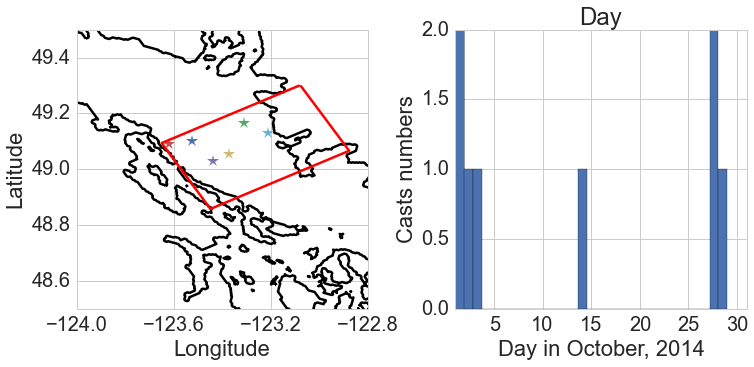

In [24]:
fig, axs = plt.subplots(1,2,figsize = (12,5))
ax =axs[0]
viz_tools.plot_coastline(ax, grid2, coords = 'map')
casts = []
for cast in sog_data:
    year = cast['Year']
    ax.plot(cast['Longitude'], cast['Latitude'], '*', markersize = 12)
    [x1, y1] = geo_tools.find_closest_model_point(cast['Longitude'] , \
    cast['Latitude'],X,Y,land_mask=bathyy.mask)
ax.plot(-123.2119,49.1292,'*',markersize = 12) ## plus the RBR cast at the south arm
ax.plot(X[390,240:350],Y[390,240:350],'r-')
ax.plot(X[450,240:350],Y[450,240:350],'r-')
ax.plot(X[390:450,240],Y[390:450,240],'r-')
ax.plot(X[390:450,350],Y[390:450,350],'r-')
ax.set_xlim([-124.,-122.8])
ax.set_xticks([-124,-123.6,-123.2,-122.8])
ax.set_ylim([48.5,49.5])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax = axs[1]
sogg.hist('Day',ax =ax,bins = 31)
ax.set_ylabel('Casts numbers')
ax.set_xlabel('Day in October, 2014')
ax.set_xlim([1,31])

In [21]:
print(X[457,264],Y[457,264])

(-123.54984283447266, 49.166595458984375)


In [25]:
print(X[447,244],Y[447,244])

(-123.62015533447266, 49.089485168457031)


# Check out RBR comparison

In [13]:
rbr = sio.loadmat('/ocean/jieliu/research/meopar/surface current/rbr.mat')
value = rbr['a']

In [28]:
value[215,0]

1.0165999999999999

In [26]:
value[569,0]

1.0347

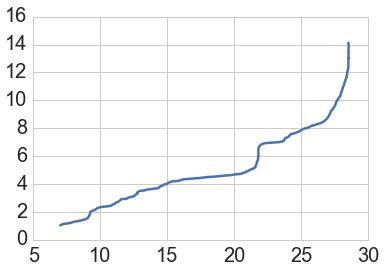

In [24]:
plt.plot(value[423:570,1],value [423:570, 0])

In [13]:
x1,y1 = geo_tools.find_closest_model_point(-123.2119,49.1292,X,Y,land_mask=bathyy.mask)

In [14]:
plume40 = nc.Dataset('/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume40_T.nc')

In [15]:
S = plume40.variables['vosaline']
depth = plume40.variables['deptht']
S = np.ma.masked_values(S,0)

* October 2nd & 14th & 29th

In [16]:
## baseline 
tracers = nc.Dataset('/results/SalishSea/nowcast/early-days/27sep3oct14/SalishSea_1h_20140927_20141003_grid_T.nc')
salinity1 = tracers.variables['vosaline']


tracers = nc.Dataset('/results/SalishSea/nowcast/early-days/11-17oct14/SalishSea_1h_20141011_20141017_grid_T.nc')
salinity2 = tracers.variables['vosaline']

tracers = nc.Dataset('/results/SalishSea/nowcast/29oct14/SalishSea_1h_20141029_20141029_grid_T.nc')
salinity3 = tracers.variables['vosaline']

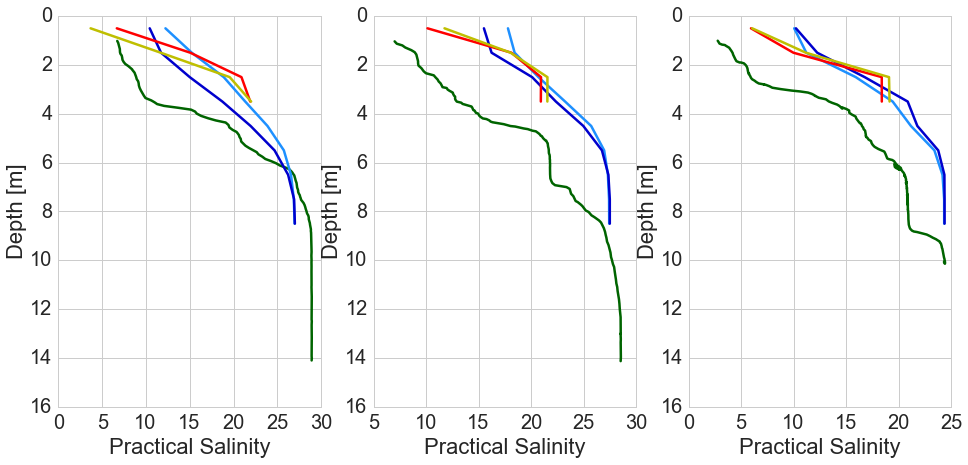

In [17]:
fig, axs = plt.subplots(1,3,figsize = (16,7))
ax = axs[0]
ax.plot(value[215:380,1],value [215:380, 0],'DarkGreen', label='RBR 22:16 pm[utc]')
ax.plot(S[46,:,0,0], depth,'DodgerBlue', label='model 22 pm[utc]')
ax.plot(S[47,:,0,0], depth,'MediumBlue', label='model 23 pm[utc]')
ax.plot(salinity1[142, 0:4, x1, y1], depth[0:4],'r', label='model 22 pm[utc]')
ax.plot(salinity1[143, 0:4, x1, y1], depth[0:4],'y', label='model 23 pm[utc]')
ax.set_ylim([16,0])
ax = axs[1]
ax.plot(value[423:570,1],value [423:570, 0],'DarkGreen', label='RBR 18:42 pm[utc]')
ax.plot(S[330,:,0,0], depth,'DodgerBlue', label='model 18 pm[utc]')
ax.plot(S[331,:,0,0], depth,'MediumBlue', label='model 19 pm[utc]')
ax.plot(salinity2[90, 0:4, x1, y1], depth[0:4],'r', label='model 18 pm[utc]')
ax.plot(salinity2[91, 0:4, x1, y1], depth[0:4],'y', label='model 19 pm[utc]')
ax.set_ylim([16,0])
ax = axs[2]
ax.plot(value[570:859,1],value [570:859, 0],'DarkGreen', label='RBR 19:52 pm[utc]')
ax.plot(S[691,:,0,0], depth,'DodgerBlue', label='model 19 pm[utc]')
ax.plot(S[692,:,0,0], depth,'MediumBlue', label='model 20 pm[utc]')
ax.plot(salinity3[19, 0:4, x1, y1], depth[0:4],'r', label='model 19 am[utc]')
ax.plot(salinity3[20, 0:4, x1, y1], depth[0:4],'y', label='model 20 pm[utc]')
ax.set_ylim([16,0])
for ax in axs:
    ax.set_xlabel('Practical Salinity')
    ax.set_ylabel('Depth [m]')

In [18]:
plume40 = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume40_T.nc')
S_0605 = plume40.variables['vosaline']
depth = plume40.variables['deptht']
S_0605 = np.ma.masked_values(S_0605,0)

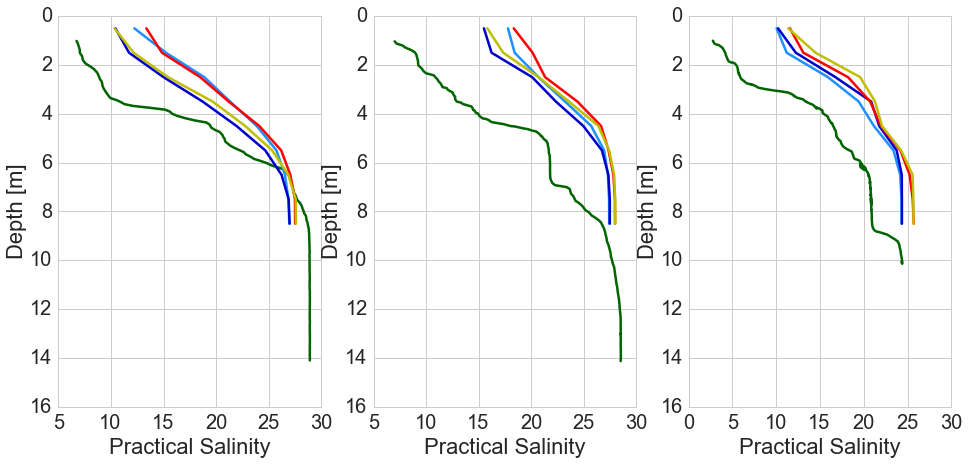

In [19]:
fig, axs = plt.subplots(1,3,figsize = (16,7))
ax = axs[0]
ax.plot(value[215:380,1],value [215:380, 0],'DarkGreen', label='RBR 22:16 pm[utc]')
ax.plot(S[46,:,0,0], depth,'DodgerBlue', label='model 22 pm[utc]')
ax.plot(S[47,:,0,0], depth,'MediumBlue', label='model 23 pm[utc]')
ax.plot(S_0605[46,:,0,0], depth,'r', label='model 22 pm[utc]')
ax.plot(S_0605[47,:,0,0], depth,'y', label='model 23 pm[utc]')
ax.set_ylim([16,0])
ax = axs[1]
ax.plot(value[423:570,1],value [423:570, 0],'DarkGreen', label='RBR 18:42 pm[utc]')
ax.plot(S[330,:,0,0], depth,'DodgerBlue', label='model 18 pm[utc]')
ax.plot(S[331,:,0,0], depth,'MediumBlue', label='model 19 pm[utc]')
ax.plot(S_0605[330,:,0,0], depth,'r', label='model 18 pm[utc]')
ax.plot(S_0605[331,:,0,0], depth,'y', label='model 19 pm[utc]')
ax.set_ylim([16,0])
ax = axs[2]
ax.plot(value[570:859,1],value [570:859, 0],'DarkGreen', label='RBR 19:52 pm[utc]')
ax.plot(S[691,:,0,0], depth,'DodgerBlue', label='model 19 pm[utc]')
ax.plot(S[692,:,0,0], depth,'MediumBlue', label='model 20 pm[utc]')
ax.plot(S_0605[691,:,0,0], depth,'r', label='model 19 pm[utc]')
ax.plot(S_0605[692,:,0,0], depth,'y', label='model 20 pm[utc]')
ax.set_ylim([16,0])
for ax in axs:
    ax.set_xlabel('Practical Salinity')
    ax.set_ylabel('Depth [m]')

In [20]:
plume40 = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume40_T.nc')
S_05 = plume40.variables['vosaline']
depth = plume40.variables['deptht']
S_05 = np.ma.masked_values(S_05,0)

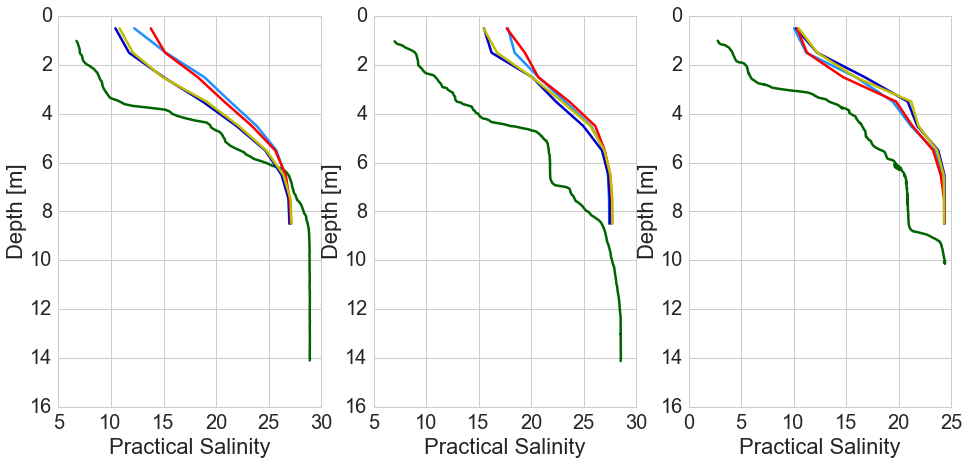

In [21]:
fig, axs = plt.subplots(1,3,figsize = (16,7))
ax = axs[0]
ax.plot(value[215:380,1],value [215:380, 0],'DarkGreen', label='RBR 22:16 pm[utc]')
ax.plot(S[46,:,0,0], depth,'DodgerBlue', label='model 22 pm[utc]')
ax.plot(S[47,:,0,0], depth,'MediumBlue', label='model 23 pm[utc]')
ax.plot(S_05[46,:,0,0], depth,'r', label='model 22 pm[utc]')
ax.plot(S_05[47,:,0,0], depth,'y', label='model 23 pm[utc]')
ax.set_ylim([16,0])
ax = axs[1]
ax.plot(value[423:570,1],value [423:570, 0],'DarkGreen', label='RBR 18:42 pm[utc]')
ax.plot(S[330,:,0,0], depth,'DodgerBlue', label='model 18 pm[utc]')
ax.plot(S[331,:,0,0], depth,'MediumBlue', label='model 19 pm[utc]')
ax.plot(S_05[330,:,0,0], depth,'r', label='model 18 pm[utc]')
ax.plot(S_05[331,:,0,0], depth,'y', label='model 19 pm[utc]')
ax.set_ylim([16,0])
ax = axs[2]
ax.plot(value[570:859,1],value [570:859, 0],'DarkGreen', label='RBR 19:52 pm[utc]')
ax.plot(S[691,:,0,0], depth,'DodgerBlue', label='model 19 pm[utc]')
ax.plot(S[692,:,0,0], depth,'MediumBlue', label='model 20 pm[utc]')
ax.plot(S_05[691,:,0,0], depth,'r', label='model 19 pm[utc]')
ax.plot(S_05[692,:,0,0], depth,'y', label='model 20 pm[utc]')
ax.set_ylim([16,0])
for ax in axs:
    ax.set_xlabel('Practical Salinity')
    ax.set_ylabel('Depth [m]')